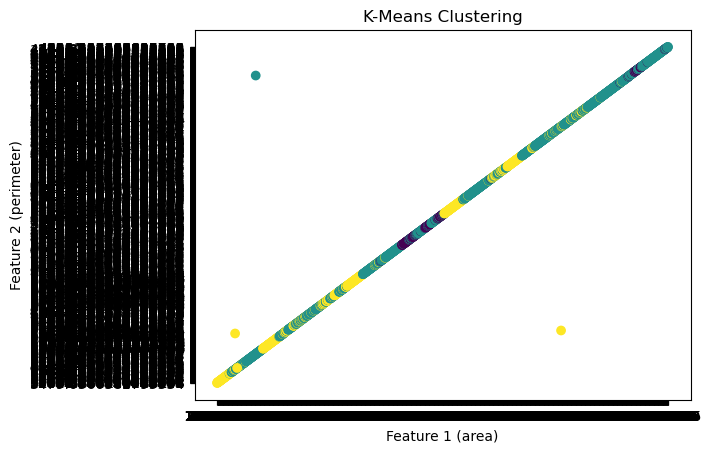

       area           perimeter physiological_length physiological_width  \
1  197484.0  3479.0360382795334                 1416                 759   
2  101248.0   2490.381811618805                 1190                 130   
3   86570.5  2290.6833270788193                 1095                 119   
4  190214.0   2856.479352593422                 1318                 254   
5  227727.0   2917.248904109001                 1324                 286   

        aspect_ratio      rectangularity        circularity  \
1  1.865612648221344   5.442182657835572  61.28948044220165   
2  9.153846153846153  1.5279314159292035  61.25554645663876   
3  9.201680672268907  1.5051894120976546  60.61221900020086   
4  5.188976377952756  1.7599756064222403  42.89628677065061   
5  4.629370629370629  1.6627979993588815  37.37080437772055   

               mean_r              mean_g              mean_b  \
1   6.395666666666667  13.643413020833334   4.388006770833333   
2   7.049316145833333   9.23201770

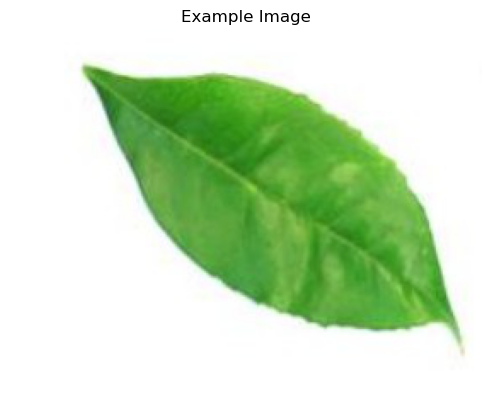

In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the dataset
def load_dataset(csv_path):
    column_names = [
        "label", "area", "perimeter", "physiological_length", "physiological_width",
        "aspect_ratio", "rectangularity", "circularity", "mean_r", "mean_g", "mean_b",
        "stddev_r", "stddev_g", "stddev_b", "contrast", "correlation",
        "inverse_difference_moments", "entropy"
    ]
    
    # Read the CSV file with column names
    data = pd.read_csv(csv_path, names=column_names)
    
    # Handle missing values
    data = data.dropna()  # Drop rows with missing values
    
    # Separate features (X) and labels (y)
    X = data.drop("label", axis=1)
    return X

# Train and test the KMeans model
def train_and_test_kmeans(X):
    # Scale the features for better clustering performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply KMeans Clustering (we'll try with 3 clusters for now)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_scaled)
    
    # Get the cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # Add cluster labels to the original data
    X['Cluster'] = labels
    
    # Visualizing the clusters (for 2D or 3D datasets, we'll just visualize first two columns here)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1 (area)')
    plt.ylabel('Feature 2 (perimeter)')
    plt.show()
    
    return kmeans, scaler, X

# Displaying an image along with the clustered data
def display_image(image_path):
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.title('Example Image')
    plt.axis('off')  # Hide axes
    plt.show()

# Main function
if __name__ == "__main__":
    # Path to the dataset
    csv_path = "../data/Flavia_features.csv"
    
    # Load the dataset
    X = load_dataset(csv_path)
    
    # Train and test the KMeans model
    kmeans_model, scaler, clustered_data = train_and_test_kmeans(X)
    
    # Display the clustered data with labels
    print(clustered_data.head())
    
    # Print the cluster centers
    print("Cluster Centers:\n", kmeans_model.cluster_centers_)
    
    # Path to the image
    image_path = "../assets/test.jpg"  
    
    # Display the image
    display_image(image_path)
